# 3.0 Data Understanding

Laut Cleve umfasst die zweite Phase mit der Verfügbarkeit und Abhängigkeiten der Daten. Für ein erfolgreiches Projekt ist es erforderlich, die Daten und deren Bedeutung genau zu verstehen. Ein DM-Projekt, indem man blind durch die Tür geht, d. h. ohne ihre Semantik zu kennen, führt unwirkürlich zum scheitern der Aufgabe. Neben sammeln der Daten, müssen diese auch beschrieben werden, auch muss die Qualtiät der zu verfügbaren Daten bestimmt werden. So helfen statistische Untersuchungen, wie die Bestimmung statistischer Maßzahlen - beispielsweise Minima, Maxima, Mittelwert sowie Korrelationskoeffizieten - geben Auskunft über die Daten. (Cleve, 2016, S. 8) Daher befasst sich dieses Kapitel, mit der Datensammlung, die Datenbeschreibung, 
die Exploaration der Daten und anschließend der Überprüfung der Datenqualität. (Chapmann, 1999, S. 17-19)

## 3.1 Datensammlung
Um die Daten zu verstehen, ist die erste Aufgabe des Datenanalysten die Sammlung der Daten. Die Datensammlung kann unternehmensintern erfolgen, aber auch aus anderen Ressourcen. In diesem Projekt wird aufgrund der Corona-Phase, zunächst mit externen Daten aus einem GitHub-Projekt (Predicitve Maintenance using Machine Learning Microsoft Casestudy) gearbeitet, in Form von CSV-Dateien. (Patel, 2016) Diese Daten beschreiben das Problem, des Projektes sehr nahe, weshalb es nach der Epedemie an den richtigten Daten angewendet werden könnte. Die Herausforderung Daten aus mehreren Datenquellen zu integrieren und nach Fehler und Inkosistenzen zu filtern, können wir uns in dieser Arbeit zunächst sparen. 

In [68]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import pylab

In [69]:
# Load data
telemetry = pd.read_csv(r"C:\Users\Admin\Desktop\Project_Code\PredictiveMainteance\Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy-master\data\PdM_telemetry.csv")
errors = pd.read_csv(r"C:\Users\Admin\Desktop\Project_Code\PredictiveMainteance\Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy-master\data\PdM_errors.csv")
maint = pd.read_csv(r"C:\Users\Admin\Desktop\Project_Code\PredictiveMainteance\Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy-master\data\PdM_maint.csv")
failures = pd.read_csv(r"C:\Users\Admin\Desktop\Project_Code\PredictiveMainteance\Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy-master\data\PdM_failures.csv")
machines = pd.read_csv(r"C:\Users\Admin\Desktop\Project_Code\PredictiveMainteance\Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy-master\data\PdM_machines.csv")

## Datenbeschreibung
Für die Datenbeschreibung werden die Daten in abgespeckter Form tabellarisch dargestellt (siehe  Tabelle 4 - 8). Jede Spalte repräsentiert ein Merkmal, auf englisch Feature und alle Zeilen bilden die Merkmale zu einem Datensatz. Die komplette Tabelle, also die Vereinigung aller Datensätze, werden dann Datenbestand genannt. (Frochte, 2018, S. 17) Lughofer beschreibt, dass für die Prognosse der Restnutzungsdauer (RUL - Remaining Useful Life) folgende Monitoring-Daten wie Gesundheits-, Zustandsüberwachung, dynamische Ausfallprognostik, Schwingungsüberwachung von Lagern und Merkmale der Maschinen bestens eignen. (Lughofer, 2019, S. 317-319) In dem folgenden GitHub Projekt existieren fünf Datenbestände, welche die wichtigsten Informationen laut Lughofer bereitstellt. Jede Zeile wird klassischerweise als Tupel aufgelistet. Angemerkt das diese Tupel bereits gefiltert wurden und keine Null-Werte enthalten. In der Praxis ist dies oft nicht der Fall.Daten wurden in folgender Zeitperiode aufgenommen ... .

Wir beginnen mit dem ersten Datenbestand siehe dazu Tabelle 4, hier werden die Telemetrie-Zeitreihendaten von 100 Maschinen die im Jahr 2015 zu jeder Stunde in Echtzeit aufgenommen wurden, beschrieben. Sie beinhalten folgende Attribute: Datum, Maschinen Id sowie physikalische Eigenschaften wie: Spannungs-, Rotations-, Druck- und Vibrationsmessungen, siehe dazu Tablle 4. (Patel, 2016)
Welche Einheiten die physikalischen Merkmale haben können wir an dieser Stelle nicht beantworten, wir gehen davon aus, dass alle Einheiten so umgeformt wurden, dass mit Ihnen gerechnet werden kann. In Summe sind es insgesammt 876100 Zeilen. 

In [70]:
# Tabelle 4
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
telemetry.head()


Total number of telemetry records: 876100


datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

Die nächste Datenquelle sind die Fehlerprotokolle siehe dazu Tabelle 5, dabei handeln es sich um Fehler, die in der historie im laufenden Betrieb beobachtet wurden. Das Fehlerdatum und die Fehlerzeiten wurden auf die nächste Stunde gerundet, da die Telemetriedaten stündlich erfasst werden. (Patel, 2016) In Summe sind es 3919 Zeilen.

In [71]:
# Tabelle 5
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total number of error records: %d" %len(errors.index))
errors.head()

Total number of error records: 3919


datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3
2 2015-01-04 06:00:00          1  error5
3 2015-01-10 15:00:00          1  error4
4 2015-01-22 10:00:00          1  error4

Ein weiterer Datenbestand beschreibt die planmäßige und außerplanmäßige Wartungsaufzeichnungen siehe dazu Tabelle 6, unter planmäßige Wartungen verstehen wir bspw., zeitliche Abstände (z. B. alle 6 Monate) oder nach einer bestimmten Anzahl an Prozessiterationen (bspw. gefahrene Kilometer) (Schmidt, 2017, S. 6), außerplanmäßige Wartungen sind wenn das Fahrzeug beispielsweise nicht Funktionsfähig ist und deshalb untersucht werden muss. So wird jedesmal der Datenbestand (Datum, Maschinen ID und Komponente) erweitert, falls während einer planmäßigen Inspektion ausgetauscht oder aufgrund eines Ausfalls ersetzt wird. Zu den Wartungsdaten gibt es sowohl 2014- als auch 2015-Einträge. (Patel, 2016) In Summe sind es 3286 Zeilen.

In [72]:
# Tabelle 6
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total number of maintenance Records: %d" %len(maint.index))
maint.head()

Total number of maintenance Records: 3286


datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
3 2014-12-13 06:00:00          1  comp1
4 2015-01-05 06:00:00          1  comp4

Die Tabelle 7 enthält einige Informationen über die Maschinen: Modelltyp und Alter (Betriebsjahre). (Patel, 2016) In Summe sind es 100 Zeilen.

In [73]:
# Tabell 7
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

Tabelle 8 sind die Aufzeichnungen über den Austausch von Komponenten aufgrund von Ausfällen. Jeder Datensatz hat ein Datum und eine Uhrzeit, eine Maschinen-ID und den ausgefallenen Komponententyp. (Patel, 2016) Eine wichtige Beobachtung ist, dass Tabelle PdM_failures eine Echte Teilmenge der Tabelle PdM_maint ist, d. h. dass jede Zeile in Tabelle PdM_failures auch in PdM_maint aufgelistet wird. Dies ist gleichbedeutend zur der Aussage, dass Tabelle PdM_maint ohne PdM_failures alle planmäßigen Wartungen entsprechen. Es ist daher anzunehmen, dass es ein wichtiger Unterschied macht ob eine Komponente bei einer Inspektion betrachtet wird oder ausgetauscht wird, weil sie Defekt ist. In Summe sind es 761 Zeilen.

In [74]:
# Tabelle 8
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2
3 2015-06-19 06:00:00          1   comp4
4 2015-09-02 06:00:00          1   comp4

## 3.3.2 Deskriptive Statistik und Datenvisualisierung
Bei numerischen Daten umfasst der Index des Ergebnisses Anzahl, Mittelwert, Standardabweichung, Min, Max sowie untere, 50 und obere Perzentile. Standardmäßig ist das untere Perzentil 25 und das obere Perzentil 75. Das 50-Perzentil ist das gleiche wie der Median. (Pandas) 

Unsere erste Statistische Auswertung, die wir mit der Programmiersprache Python geschrieben haben, schließt die Tabelle 4 mit ein. 

In [75]:
# Tabelle 9
telemetry.describe()

machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072

Nachdem die wichtigsten Kennzahlen aufgelistet wurden (siehe Tabelle 9), können einige Annahmen getroffen werden. Das erste Merkmal machineID hat an dieser Stelle keine große Aussagekraft, weshalb wir nicht näher darauf eingehen. Aus dem Mathematik Studium ist bekannt, dass die Normalverteilung, Merkmale wie:

<ul>
  <li>unimodale, symmetrische Dichtefunktion mit Maximum bei x = &mu;</li>
  <li>Wendepunkt der Dichtefunktion bei x=&mu; &#177; &sigma;</li>
  <li>Der Erwartungswert E(x) = &mu; fällt mir dem Modus und Median zusammen</li>
  <li>Varianz Var(x) = &sigma;&sup2;</li>
</ul>

Wir nutzen die Eigenschaft, dass der Erwartungswert bzw. Mittelwert näherungsweise gleich dem Median ist (für alle Variablen), um eine Vermutung aufzustellen, dass es sich hierbei um eine Normalverteilung handelt. (Kiesel, 2019, S. 32)
Dies gibt auch die Vermutung, dass die Daten frei von Ausreißern ist. Hinzu kommt, dass die Standardabweichung  relativ gering ist, was auch zu einer Normalverteilung hindeutet. Wir werden in Abschnitt 3.3.5 zeigen, dass diese Variablen nicht Normalverteilt ist. (Feidel, 2019)

In Abbildung 3 wurden die wichtigsten Variablen abhängig von der Zeit-Achse gruppiert anhand dermachineIdmit der ID gleich ”1” visualisiert, eine wichtige Erkenntnis,ist dass die Daten weder (streng) monoton steigend noch fallend sind, sie stagnieren umden Mittelwert. Weiter zeigt die rot gestrichelte Linie das Minimum von der Spannungsowie die grün gestrichelte Line das Maximum zeigt, diese Extremwerte von der Vibrati-on wurden in den weiteren Plots übertragen um Trends zu ersichtigen. Die Beobachtungzeigt, dass diese Extremwerte nicht die Extremwerte bei anderen Dimensionen übertragen. Überprüft wurde diese Erkenntnis auch für die komplette Zeitreihe, dargestellt wirdnur ein Monat angefangen am ersten Messtag, da dies eine übersichtlichere Darstellungist und die Daten dadurch nicht gequetscht dargestellt werden. Später werden wir Verfahren zur multivariate Statistik sehen.

Text(0.5, 0, 'Date')

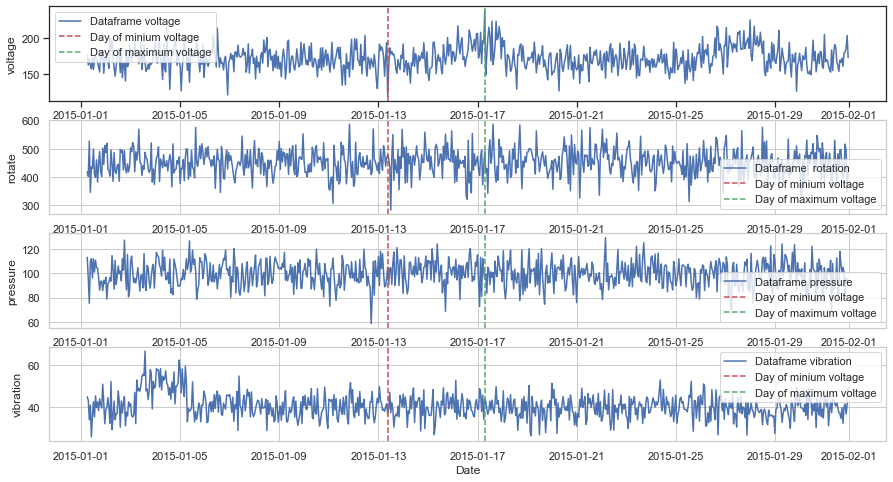

In [76]:
# Abbildung 3
plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt', 'rotate', 'pressure', 'vibration']]

datetime_min__idx = plot_df.datetime[plot_df.volt.idxmin(plot_df.volt)]
datetime_max__idx = plot_df.datetime[plot_df.volt.idxmax(plot_df.volt)]


plt.figure(figsize=(15, 8))
plt.subplot(411)
sns.set_style("whitegrid")
plt.plot(plot_df['datetime'], plot_df['volt'], label='Dataframe voltage')
plt.axvline(x=datetime_min__idx, color='r', linestyle='--', label='Day of minium voltage')
plt.axvline(x=datetime_max__idx, color='g', linestyle='--', label='Day of maximum voltage')
leg = plt.legend();
plt.ylabel('voltage')

# make x-axis ticks legible
#adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Date')


plt.subplot(412)
sns.set_style("whitegrid")
plt.plot(plot_df['datetime'], plot_df['rotate'], label='Dataframe  rotation')
plt.axvline(x=datetime_min__idx, color='r', linestyle='--', label='Day of minium voltage')
plt.axvline(x=datetime_max__idx, color='g', linestyle='--', label='Day of maximum voltage')
leg = plt.legend();
plt.ylabel('rotate')

# make x-axis ticks legible
#adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Date')

plt.subplot(413)
sns.set_style("whitegrid")
plt.plot(plot_df['datetime'], plot_df['pressure'], label='Dataframe pressure')
plt.axvline(x=datetime_min__idx, color='r', linestyle='--', label='Day of minium voltage')
plt.axvline(x=datetime_max__idx, color='g', linestyle='--', label='Day of maximum voltage')
leg = plt.legend();
plt.ylabel('pressure')

# make x-axis ticks legible
#adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Date')

plt.subplot(414)
sns.set_style("whitegrid")
plt.plot(plot_df['datetime'], plot_df['vibration'], label='Dataframe vibration')
plt.axvline(x=datetime_min__idx, color='r', linestyle='--', label='Day of minium voltage')
plt.axvline(x=datetime_max__idx, color='g', linestyle='--', label='Day of maximum voltage')
leg = plt.legend();
plt.ylabel('vibration')

# make x-axis ticks legible
#adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Date')

Die nächsten drei Tabellen zeigen Häufigkeitstabellen der Fehlertypen, Inspektionen der Komponenten und Ersatzteile, die durch einen Ausfall ausgetauscht wurden. Betrachten wir Tablle 11, kann man näherungsweise sagen, dass die Komponenten gleichverteilt sind, was aber nicht auf Tabelle 12 sich wieder spiegelt. Hier wird schnell ersichtlich, dass alle compN ungefähr gleich oft gewartet wurden. Weitere Auffälligkeiten sind be-merkbar, so stimmt die Reihenfolge der Komponenten, nicht über ein, vergleiche dazuTabelle 11 und Tabelle 12.

In [77]:
# Tabelle 11
rel_error = errors.errorID.value_counts(normalize=True)
abs_error = errors.errorID.value_counts()
cum_error = np.cumsum(rel_error) # calculate the cdf - also discrete

result_error = pd.concat([abs_error, rel_error, cum_error], axis=1, sort=False)
result_error = result_error.set_axis(['Absolut frequency', 'Relative frequency', 'Cumulative frequency'], axis=1, inplace=False)
result_error

Absolut frequency  Relative frequency  Cumulative frequency
error1               1010            0.257719              0.257719
error2                988            0.252105              0.509824
error3                838            0.213830              0.723654
error4                727            0.185507              0.909161
error5                356            0.090839              1.000000

In [78]:
# Tabelle 12
rel_comp = maint.comp.value_counts(normalize=True)
abs_comp = maint.comp.value_counts()
cum_comp = np.cumsum(rel_comp) # calculate the cdf - also discrete

result_comp = pd.concat([abs_comp, rel_comp, cum_comp], axis=1, sort=False)
result_comp = result_comp.set_axis(['Absolut frequency', 'Relative frequency', 'Cumulative frequency'], axis=1, inplace=False)
result_comp

Absolut frequency  Relative frequency  Cumulative frequency
comp2                863            0.262629              0.262629
comp4                811            0.246805              0.509434
comp3                808            0.245892              0.755326
comp1                804            0.244674              1.000000

In [79]:
# Tabelle 13
rel_failure = failures.failure.value_counts(normalize=True)
abs_failure = failures.failure.value_counts()
cum_failure = np.cumsum(rel_failure) # calculate the cdf - also discrete

result_failure = pd.concat([abs_failure, rel_failure, cum_failure], axis=1, sort=False)
result_failure = result_failure.set_axis(['Absolut frequency', 'Relative frequency', 'Cumulative frequency'], axis=1, inplace=False)
result_failure

Absolut frequency  Relative frequency  Cumulative frequency
comp2                259            0.340342              0.340342
comp1                192            0.252300              0.592641
comp4                179            0.235217              0.827858
comp3                131            0.172142              1.000000

## 3.3.3 Testtheorie

In Tabelle 9 vermuteten wir bereits, dass die Parameter auf eine Normalverteilung hindeuten. Die Wichtigkeit der Normalverteilung, ist für die Annahme vieler statistischerVerfahren wie z. B. t-Tests, linerare Regressionsanalyse, Diskriminanzalyse und Varianzanalyse unerlässlich, so sind Schlussfolgerungen nicht zulässig bzw. gülitg falls die Normalitätsannahme verletzt wird. Übliche Verfahren bei der Beurteilung, ob eine Zufallsstichprobe unabhängiger Beobachtungen der Größe n aus einer Population mit einerNormalverteilung sind:
<ul>
  <li>graphische Methoden: Histogramme, Boxplots, Quantil-Quantil-Diagramm (QQ),</li>
  <li>numerische Methoden: Schiefe- und Kurtosis-Indizes</li>
  <li>formale Normalitätstests: Shapiro-Wilk (SW)-Test, Kolmogorov-Smirnov (KS)-Test, Lilliefors (LF)-Test und Anderson-Darling (AD) Test. (Razali und Yap, 2011,S. 21)</li>
</ul>

In der Wissenschaftlichen Arbeit von Razali und Yap (2012) wurden verschiedene Normalitätstest untersucht, wobei der als meist Aussagekräftigste Test der Shapiro-Wilk-Testist, gefolt von Anderson-Darling-, Lilliefors- und Kolmogorov-Smirnov-Test. In diesem Abschnitt werden wir die graphischen Methoden vorstellen, sowie zwei beliebte formale MethodenShapiro-Wilk- und Kolmogorov-Smironv-Test.5Die anderen Methoden können in dem Paper von Razali und Yap nachgelesen werden.

Die erste Abbildung (siehe Abbildung 4) stellt die Histogramme der univariaten Variablen der Tabelle 4 dar. Alle vier Histogramme zeigen klassische Merkmale einer Normalverteilung (symmetrische Dichtefunktion mit Maximum beim Erwartungswert).

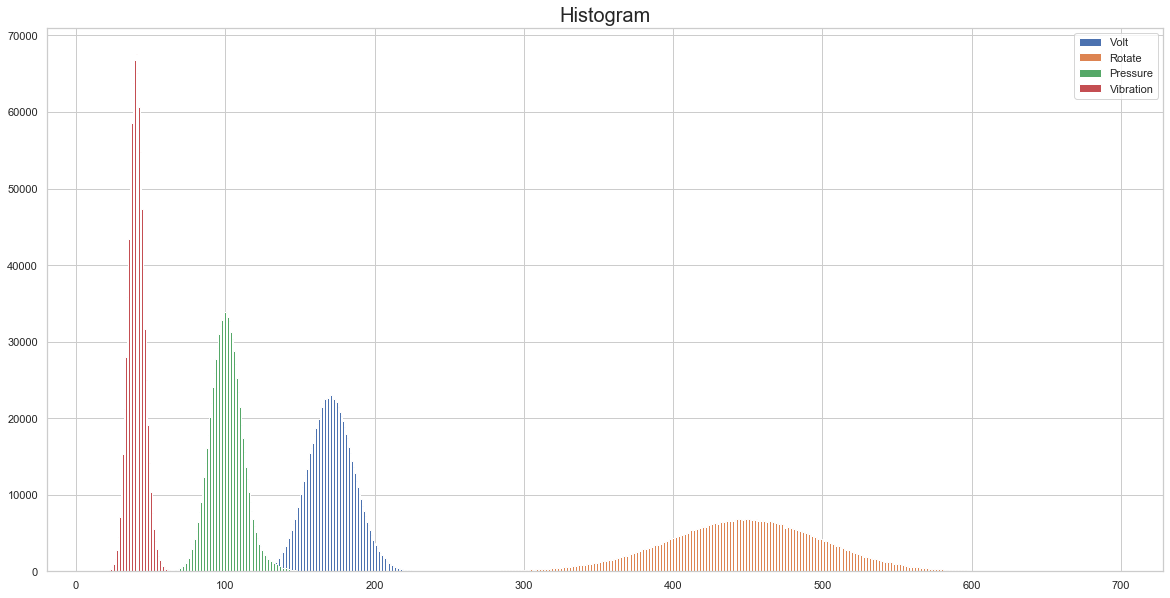

In [80]:
# Abbildung 4
# Histogramm
plt.figure(figsize=(20,10))

parameter = telemetry.volt
loc, scale = norm.fit(parameter)
n = norm(loc=loc, scale=scale)
plt.hist(parameter, bins=np.arange(parameter.min(), parameter.max()), label='Volt')


parameter = telemetry.rotate
loc, scale = norm.fit(parameter)
n = norm(loc=loc, scale=scale)
plt.hist(parameter, bins=np.arange(parameter.min(), parameter.max()), label='Rotate')


parameter = telemetry.pressure
loc, scale = norm.fit(parameter)
n = norm(loc=loc, scale=scale)
plt.hist(parameter, bins=np.arange(parameter.min(), parameter.max()), label='Pressure')


parameter = telemetry.vibration
loc, scale = norm.fit(parameter)
n = norm(loc=loc, scale=scale)
plt.hist(parameter, bins=np.arange(parameter.min(), parameter.max()), label='Vibration')

plt.legend()
plt.title('Histogram', fontsize=20)
plt.show()

### Satz 9.1 (Standardisierung)
Sei $X$ eine Zufallsvariable mit existierenden Erwartungswert und Varianz. So lässt sich jede Zufallsvariable $X$ durch Standardisierung auf eine Zentrierung der Zufallsvariable $Z$ zurückführen.<p>
    <center>
         $Z=\frac{X-\mu}{\sigma}$
    </center>

Ist $X$ normalverteilt mit Erwartungswert $\mu$ und Varianz $\sigma^2$, so ist Z standardnormalverteilt, d. h. $Z \; \sim \; \mathcal{N}(0,1)$. (Kiesel, 2019, S. 34 - 35) 
    Es handelt sich um eine Studentisierung falls die Verteilung der Zufallsvariable unbekannt ist und somit der Erwartungswert mit dem arithmetische Mittel und statt der Varianz die empirische Varianz ersetzt wird. (Academic)

In [81]:
# Satz 9.1
# Standardisierung
temp = np.sort(telemetry.volt, axis = 0)
scaled_volt = (temp - temp.mean())/temp.std()

temp = np.sort(telemetry.rotate, axis = 0)
scaled_rotate = (temp - temp.mean())/temp.std()

temp = np.sort(telemetry.pressure, axis = 0)
scaled_pressure = (temp - temp.mean())/temp.std()

temp = np.sort(telemetry.vibration, axis = 0)
scaled_vibration = (temp - temp.mean())/temp.std()

Der Quantil-Quantil-Plot (QQ-Plot) ist das am häufigsten verwendete und wirksams-te diagnostische Hilfsmittel zur Überprüfung der Normalität der Daten (im visuellenSinne). (Razali, 2011, S. 21) Die nächste Abbildung (siehe Abbildung 5) zeigt den QQ-Plot, welche die standardisierten (studentisierten) Daten gegen eine Standardnormalverteilung vergleicht. Den Satz 9.1 zu Standarisierung findet man im Anhang. Wären unsere Daten perfekt (Standard) Normalverteilt, würden die blauen Punkte direkt auf die rote Gerade (Standardnormalverteilung) abbilden. In unserer Darstellung weicht z. B. im Subplot Pressure das obere Quantil von der Standardnormalverteilung ab. Was gegen eine Normalverteilung spricht.

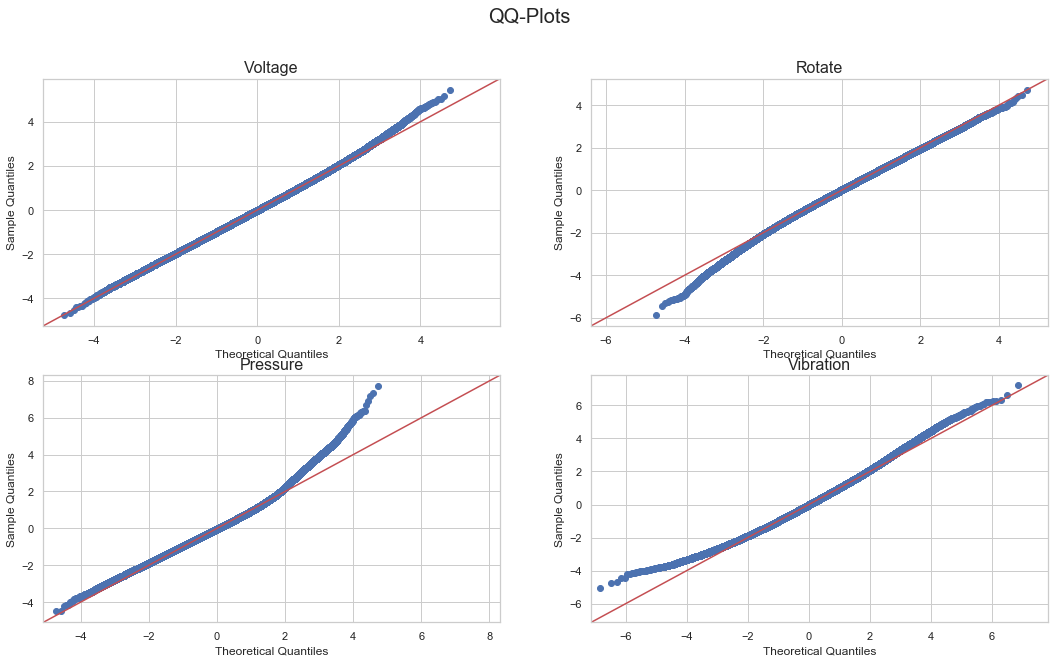

In [82]:
# Abbildung 5
# QQ-Plots
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(scaled_volt, line='45', ax=ax)
ax.set_title('Voltage', fontsize=16)

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(scaled_rotate, line='45', ax=ax)
ax.set_title('Rotate', fontsize=16)



ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(scaled_pressure, line='45', fit=True, ax=ax)
ax.set_title('Pressure', fontsize=16)


ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(scaled_vibration, dist=stats.t, line='45', fit=True, ax=ax)
ax.set_title('Vibration', fontsize=16)

fig.suptitle('QQ-Plots', fontsize=20)
plt.show()

Auch für die Box-Plot Visualisierung haben wir den gebraucht des Satzes 9.1 gemacht(siehe Abbildung 6). In dieser Ansicht sieht man, dass das obere Quartil die gleiche länge zum Median hat, wie das untere Quartil, welches ein hinreichendes Merkmal einer Normalverteilung ist. Falls die Beobachtungswerte mehr als das 1,5-fache der Boxlänge vom unteren Quartil nach unten oder vom oberen Quartil nach oben entfernt liegt, wird er als potenzieller Ausreiser (engl. Outlier) gekennezeichnet. (Cleff, 2015, S. 52) Diese Punkte, sollten dann besonderer Aufmerksamkeit gewidmet werden.

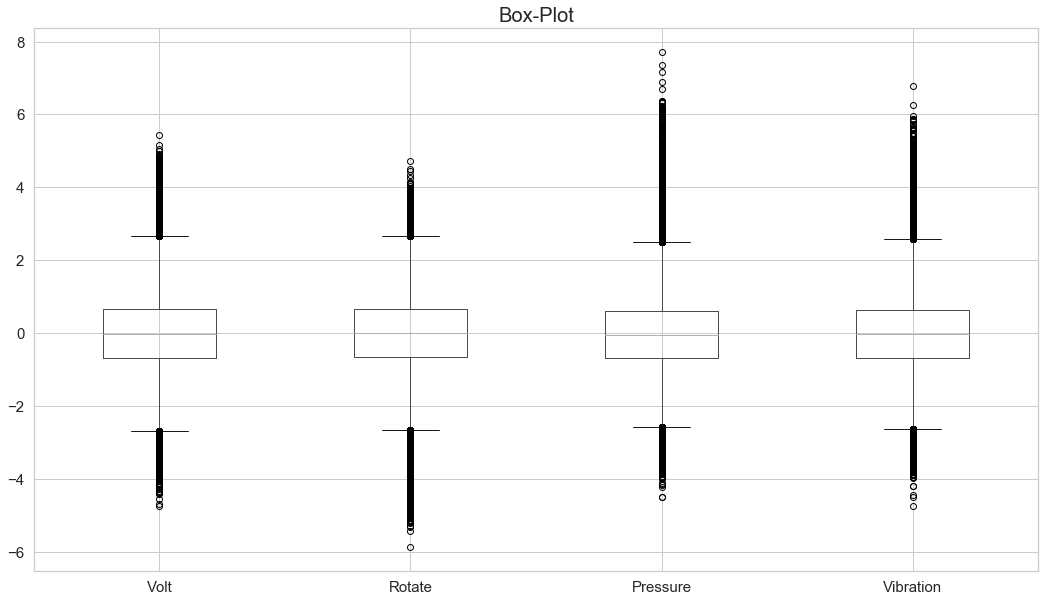

In [83]:
# Abbildung 6
df = pd.DataFrame({'Volt': scaled_volt,
                    'Rotate': scaled_rotate,
                  'Pressure': scaled_pressure,
                  'Vibration': scaled_vibration})

plt.figure(figsize=(18,10))
df.boxplot(fontsize=15)
plt.title('Box-Plot', fontsize=20)
plt.show()

### Satz 3.1 (Kolmogorov-Smirnov-Anpassungstest (KS-Test))

Gegeben sei eine unabhängige identisch verteilte Stichprobe $X_{1}, X_{2},...X_{n}.$ Sei $\hat F$ die hypothetische Verteilungsfunktion der $X_{i}$. Sei weiter $F_n(x)$  die auf der Grundlage der Zufallsstichprobe geschätzte empirische Verteilungsfunktion (EDF). Es soll die Hypothese getestet werden, dass eine vorgegebene Stichprobe $F_n$ die Verteilungsfunktion der $X_i$ ist.
   
   <b>Hyptohesen:</b>
   
   $H_0$: $F_n$ ist die Verteilungsfunktion der $X_i$
   
   $H_1$: $F_n$ ist nicht die Verteilungsfunktion der $X_i$<p>   
   <center>
         $T=\underset{x}{\sup}|\hat F(x)-F_n(x)|$
   </center>
   
   Falls T das Quantil $1-\alpha$ überschreitet, dann wird $H_0$ abgelehnt. (Kiesel, 2019, S. 319 und Razali, 2011, S. 23)


### Satz 3.2 (Shapiro-Wilk-Anpassungstest (SW-Test))

Der SW-Test ist ein Test auf Normalverteilung für metrische Daten. Analog zu oben, sollen die Hypothesen getestet werden. Die $W$ Statistik hat die folgende Form:<p>
   <center>
         $W=\frac{\sum_{i=1}^{n}a_{i}x_{i}^2}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}$
   </center>
    
wobei $x_{i}$ die geordneten Stichprobenwerte sind ($x_1$ ist der kleinste) und $a_i$ Konstanten sind, die aus den Mittelwerten, Varianzen und Kovarianzen der Ordnungsstatistik einer Stichprobe der Größe n aus einer Normalverteilung erzeugt werden. Der Wertebereich von $W$ liegt zwischen 0 und 1. Für kleine Werte wird $H_0$ abgelehnt. Der Algorithmus liefert gute Ergebnisse für Datengrößen: $3\leq n\leq 5000$. (Razali, 2011, S. 25)
   
In unserer Teststatisik (siehe Tabelle 2), liegen alle p-Werte unterhalb von uns selbst definierten α= 0.05. Dies würde im Normalfall, dazu führen dass die Nullhpythose verworfen wird. Da es sich bei unseren Daten aber um ein spezial Fall handelt (Stichproben= 876000000000), müssen beide Tests kritisch betrachtet werden. (Razali, 2011, S.23- 25) Beide analytische Tests werden mit zuehmender Stichprobengröße sensibler. Mit anderen Worten bedeutet es, dass obwohl wir in dem Histogram eine nahezu perfekte Normalverteilung sehen, einige weiniger Ausreißer, dazu führen könnten, um die Siginifikanz so sehr zu beeinflussen, sodass die Nullhypothese verworfen wird. Im Zweifelsfall,sollte man sich also daher eher auf die Diagramme beziehen. (Björn, 2019)

In [84]:
# Tabelle 2

# Test-Statistik
# Satz 3.1 KS-Test
df_kstest = pd.DataFrame({'Volt': stats.kstest(scaled_volt, 'norm'),
                        'Rotate': stats.kstest(scaled_rotate, 'norm'),
                        'Pressure': stats.kstest(scaled_pressure, 'norm'),
                        'Vibration': stats.kstest(scaled_vibration, 'norm')})

df_kstest = df_kstest.rename(index={0: 'KStest Statistics', 1:'KStest P-Value'})
df_kstest = df_kstest.T

# Satz 3.2 SW-Test
df_swtest = pd.DataFrame({'Volt': stats.shapiro(scaled_volt),
                        'Rotate': stats.shapiro(scaled_rotate),
                        'Pressure': stats.shapiro(scaled_pressure),
                        'Vibration': stats.shapiro(scaled_vibration)})

df_swtest = df_swtest.rename(index={0: 'Shapiro Statistics', 1:'Shapiro P-Value'})
df_swtest = df_swtest.T


df_swtest.join(df_kstest)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro Statistics  Shapiro P-Value  KStest Statistics  \
Volt                 0.999827     1.222951e-16           0.005394   
Rotate               0.998667     7.006492e-45           0.008782   
Pressure             0.989925     0.000000e+00           0.023237   
Vibration            0.995951     0.000000e+00           0.014732   

           KStest P-Value  
Volt         1.453916e-22  
Rotate       4.131931e-59  
Pressure     0.000000e+00  
Vibration   1.425205e-165

## 3.4 Lineare Zusammenhänge und Korrelationsanalyse

Die Wichtigkeit der Korrelationsanalyse quantifiziert den Zusammenhang zweier Merkmale X und Y. Welche Verfahren in der Korrelationsanalyse verwendet wird, hängt von den untersuchenden Variablen ab, so existieren lineare und nicht lineare Zusammenhänge. Die lineare Korrelationsanalyse ist robust und effizient, erfasst aber nur lineare Zusammenhänge. Die nicht lineare Korrelationsanalyse erfasst auch nicht lineare Zusammenhänge, muss aber sorgfältig parametriert werden. (Runkler, 2015, S. 59) Bei multivariaten Datensätzen wird zusätzlich für jedes Paar von Variablen der Korrelationskoeffizient berechnet. Will man den Zusammenhang zweier metrischer Merkmaleanalysieren, sollte als erstes immer die Inspektion des Streuungsdiagramms erfolgen.

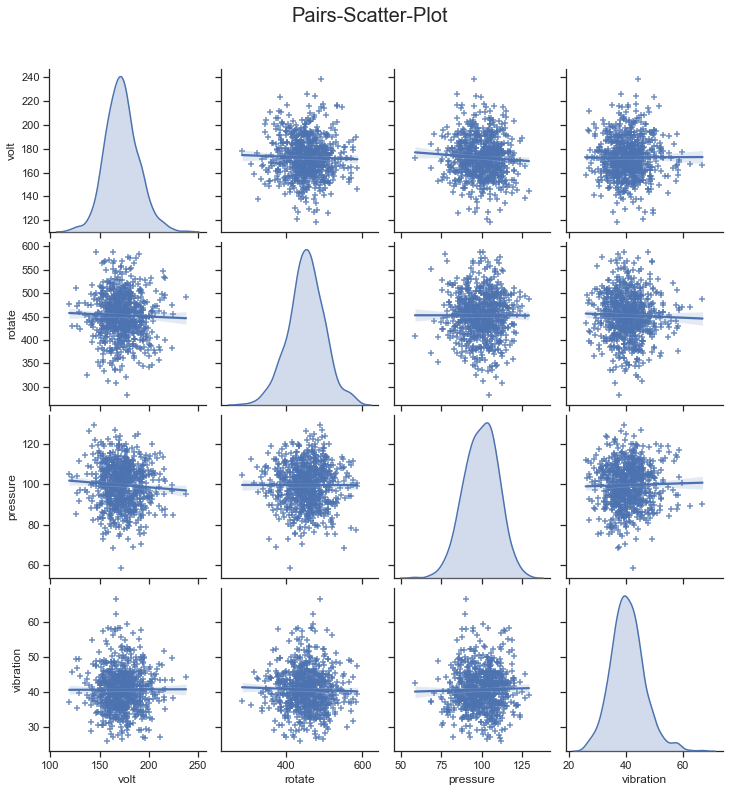

In [85]:
# Abbildung 7
df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['volt', 'rotate', 'pressure', 'vibration']]
sns.set(style="ticks")
p1 = sns.pairplot(df, diag_kind="kde", markers="+", kind="reg")
p1.fig.suptitle("Pairs-Scatter-Plot", y=1.08, fontsize=20) # y= some height>1             
plt.show()

### Satz 3.3 (Korrelationskoeffizenten)

Gegeben seien zwei (metrische) Merkmale X und Y, weiter sind die zu untersuchenden Variablen normalverteilt und es existiert ein linearer Zusammenhang. Dann kann man den Stichprobenkorrelationskoeffizienten nach Bravais-Pearson wie folgt berechnen: <p>
    <center>
       $ R_{Pear} :=\frac{S_{X,Y}}{S_X S_Y} = \frac{
        \sum_{i=1}^n(X_i-\overline X)(Y_i-\overline Y)
        }{
        \sqrt{
        \sum_{i=1}^n(X_i-\overline X)^2
        \sum_{i=1}^n(Y_i-\overline Y)^2
        }
        }\in [-1, 1]$ 
    </center>
       
Sind die obigen Vorraussetzungen nicht gegeben, so kann man die Formel ersetzten durch die Spearman-Korrelation-Formel, welche bis auf die Ränge eins zu eins übernommen wird:<p>
   <center>
        $R_\text{Sp} = \frac{\sum_{i=1}^n (\text{rang}(X_i) - \overline{\text{rang}(X)})     (\text{rang}(Y_i) - \overline{\text{rang}(Y)})}{ \sqrt{\sum_{i=1}^n (\text{rang}(X_i) - \overline{\text{rang}(X)})^2} \cdot \sqrt{\sum_{i=1}^n (\text{rang}(Y_i) - \overline{\text{rang}(Y)})^2} }\in [-1, 1]$
    </center>

Beide Methoden liefern einen Korrelationkoeffizenten und haben die gleiche Interpretation:
<ul>
  <li>Für R = &#177; 1 gilt, wenn alle Datenpunkte auf einer steigenden\fallenden Geraden liegen, bei r = 0, existiert kein linearer Zusammenhang  (Unkorreliertheit der Merkmale).</li>
  <li>Aus R = 0 folgt nicht die statistische Unabhängigkeit; es folgt aber die Unkorreliertheit aus der Unabhängigkeit.</li>
  <li>Positive Werte von R zeigen einen positiven Zusammenhang (im Sinne von: steigt der Wert von X, steigt tendenziell (also nicht unbedingt immer, aber „im Mittel“) auch der Wert von Y), negative Werte von r zeigen einen negativen Zusammenhang. (Kiesel, 2019, S. 218 und Engelhardt, 2015)</li>
</ul>


In [86]:
# Satz 3.3 (Korrelationskoeffizenten Bravis-Pearson)
df.corr(method='spearman', min_periods=1)

volt    rotate  pressure  vibration
volt       1.000000 -0.037107 -0.058049   0.021090
rotate    -0.037107  1.000000  0.010408  -0.054428
pressure  -0.058049  0.010408  1.000000   0.029593
vibration  0.021090 -0.054428  0.029593   1.000000

In Abbildung 7 erkannt man, dass keine dieser Abbildungen, Zusammenhangsstrukturenaufweisen. Wären die Daten normalverteilt und linear würde man nach Bravais-Pearsonvorgehen, jedoch ist hier das Gegenteil der Fall, sodass sich die Methode von Charles Spearmanbesser eignet. In Tabelle 3 werden die Korrelationskoeffizieten aufgelistet, alle Merkmale weißen Unkorrliertheit auf bis auf die Hauptdiagonale.